In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [0]:
MAX_FEATURES = 10000 
# Number of words to consider as features, only most frequent MAX_FEATURES words will be considered
MAX_REVIEW_LEN = 500
# Reviews longer than MAX_REVIEW_LEN will get cutoff at this length
BATCH_SIZE = 32

In [0]:
import numpy as np

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)

# preprocessing
x_train = sequence.pad_sequences(x_train, maxlen=MAX_REVIEW_LEN)
x_test = sequence.pad_sequences(x_test, maxlen=MAX_REVIEW_LEN)
y_train = np.asarray(y_train, dtype='float32')
y_test = np.asarray(y_test, dtype='float32')

In [6]:
from keras.layers import Dense, SimpleRNN, Embedding, Flatten
from keras.models import Sequential

model = Sequential()
model.add( Embedding(MAX_FEATURES, 32) )
model.add( SimpleRNN(32) )
model.add( Dense(1, activation='sigmoid') )

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.6471 - acc: 0.6080 - val_loss: 0.7502 - val_acc: 0.5468
Epoch 2/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.4134 - acc: 0.8228 - val_loss: 0.4689 - val_acc: 0.7760
Epoch 3/10
 9984/20000 [=============>................] - ETA: 24s - loss: 0.2977 - acc: 0.8811

20000/20000 [==============================] - 52s 3ms/step - loss: 0.2988 - acc: 0.8787 - val_loss: 0.4152 - val_acc: 0.8176
Epoch 4/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.2376 - acc: 0.9077 - val_loss: 0.4240 - val_acc: 0.8268
Epoch 5/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1741 - acc: 0.9371 - val_loss: 0.3672 - val_acc: 0.8666
Epoch 6/10
  384/20000 [..............................] - ETA: 48s - loss: 0.0727 - acc: 0.9792

20000/20000 [==============================] - 52s 3ms/step - loss: 0.1088 - acc: 0.9622 - val_loss: 0.4009 - val_acc: 0.8622
Epoch 7/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.0728 - acc: 0.9768 - val_loss: 0.5718 - val_acc: 0.7830
Epoch 8/10
18432/20000 [==========================>...] - ETA: 3s - loss: 0.0490 - acc: 0.9851

20000/20000 [==============================] - 52s 3ms/step - loss: 0.0500 - acc: 0.9845 - val_loss: 0.6011 - val_acc: 0.7908
Epoch 9/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.0327 - acc: 0.9900 - val_loss: 0.5762 - val_acc: 0.8272
Epoch 10/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.0199 - acc: 0.9942 - val_loss: 0.6467 - val_acc: 0.8156


In [0]:
def plot_from_history(history):
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  
  epochs = range(1, len(loss)+1)
  
  from matplotlib import pyplot as plt
  plt.style.use('ggplot')
  %matplotlib inline
  
  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  
  plt.plot(epochs, acc, 'bo', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

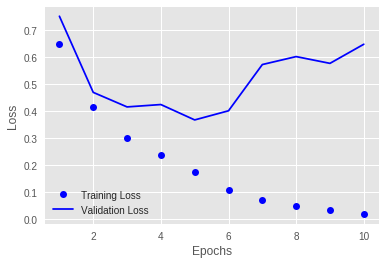

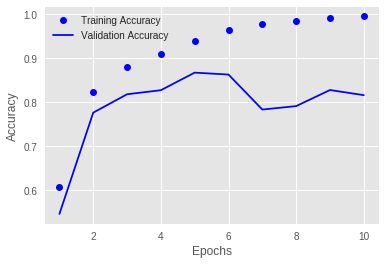

In [9]:
plot_from_history(history)

In [11]:
model = Sequential()
model.add( Embedding(MAX_FEATURES, 32) )
model.add( SimpleRNN(32) )
model.add( Dense(1, activation='sigmoid') )

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.fit(x_train, y_train, epochs=5, batch_size=128)
model.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 63s 3ms/step - loss: 0.5453 - acc: 0.7197
Epoch 2/5
25000/25000 [==============================] - 63s 3ms/step - loss: 0.3378 - acc: 0.8607
Epoch 3/5
18944/25000 [=====================>........] - ETA: 15s - loss: 0.2806 - acc: 0.8907

25000/25000 [==============================] - 63s 3ms/step - loss: 0.2782 - acc: 0.8912
Epoch 4/5
25000/25000 [==============================] - 63s 3ms/step - loss: 0.2390 - acc: 0.9078
Epoch 5/5
  416/25000 [..............................] - ETA: 1:01

25000/25000 [==============================] - 58s 2ms/step


[0.40499301533699034, 0.81428]